<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="ПОбучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span></li><li><span><a href="#Проверка-качества-модели-на-тестовой-выборке" data-toc-modified-id="Проверка-качества-модели-на-тестовой-выборке-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка качества модели на тестовой выборке</a></span></li><li><span><a href="#Проверка-модели-на-вменяемость" data-toc-modified-id="Проверка-модели-на-вменяемость-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка модели на вменяемость</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

Оператор мобильной связи «Мегалайн» выяснил: многие клиенты пользуются архивными тарифами. Они хотят построить систему, способную проанализировать поведение клиентов и предложить пользователям новый тариф: «Смарт» или «Ультра».

На основе данных нужно построить модель для задачи классификации, которая выберет подходящий тариф. 

Необходимо: 
1) построить модель с максимально большим значением accuracy;  
2) довести долю правильных ответов по крайней мере до 0.75. 

### Описание данных
Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. 

Известно:
* `сalls` — количество звонков,
* `minutes` — суммарная длительность звонков в минутах,
* `messages` — количество sms-сообщений,
* `mb_used` — израсходованный интернет-трафик в Мб,
* `is_ultra` — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).

**План** 
1) Изучу данные. Предобработка данных не требуется — уже сделано в проекте спринта "Статистический анализ".  
2) Разделю исходные данные на обучающую, валидационную и тестовую выборки.  
3) Исследую качество разных моделей, меняя гиперпараметры. Запишу краткие выводы исследования.  
4) Проверю качество модели на тестовой выборке.  
5) В рамках проекта также нужно выполнить дополнительное задание: проверить модели на вменяемость. В общем, постараюсь выполнить. 

## Изучение данных

In [1]:
import pandas as pd 
import numpy as np
# для графиков
import seaborn as sns
from matplotlib import pyplot as plt
#import random as rd # для генерации случайных величин

# импорт моделей и методов проверки качества моделей
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # загрузим тоже

# добавила
from sklearn.metrics import plot_confusion_matrix # для отрисовки матрицы ошибок
from sklearn.dummy import DummyClassifier # для константной модели

In [2]:
# два числа после запятой
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
# читаем данные
try:
    data = pd.read_csv('/datasets/users_behavior.csv')
except:
    data = pd.read_csv('users_behavior.csv')

In [4]:
data.head(5)

,calls,minutes,messages,mb_used,is_ultra
0,40.00,311.90,83.00,"19,915.42",0
1,85.00,516.75,56.00,"22,696.96",0
2,77.00,467.66,86.00,"21,060.45",0
3,106.00,745.53,81.00,"8,437.39",1
4,66.00,418.74,1.00,"14,502.75",0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

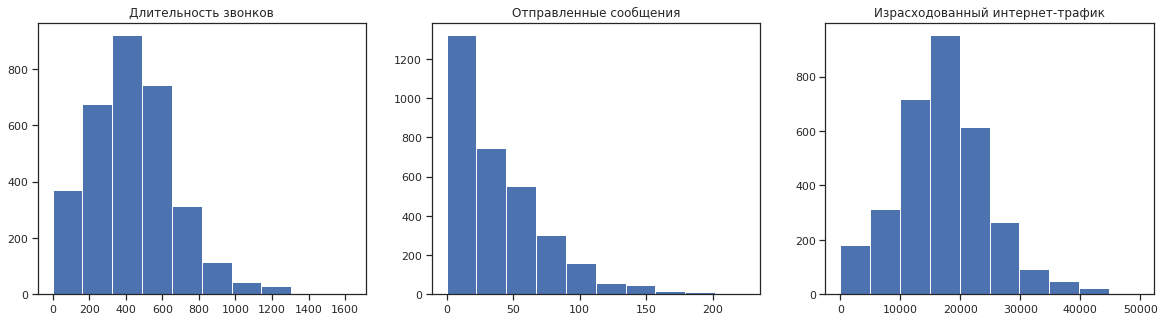

In [7]:
# посмотрим на распределения 

sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 3, figsize=(25,6))

ax[0].hist(x=data[['minutes']])
ax[0].set_title('Длительность звонков')

ax[1].hist(x=data[['messages']]) 
ax[1].set_title('Отправленные сообщения')

ax[2].hist(x=data[['mb_used']]) 
ax[2].set_title('Израсходованный интернет-трафик')

fig.set_figwidth(20)     #  ширина и
fig.set_figheight(5)    #  высота "Figure"

plt.show()

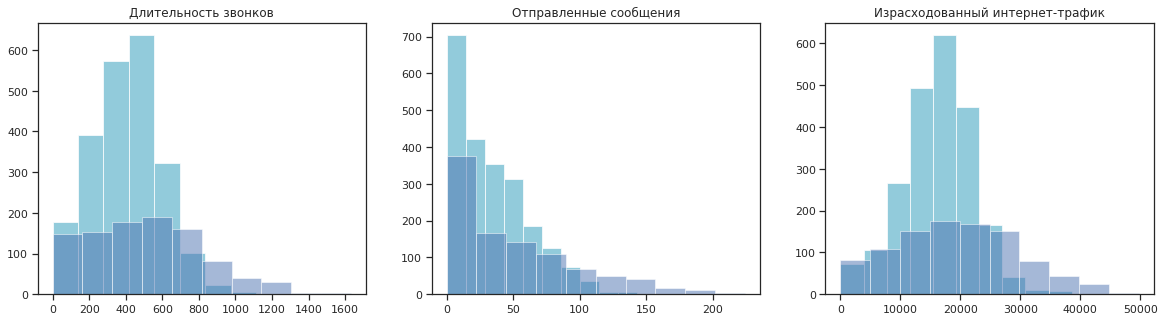

In [8]:
# посмотрим на распределения в разрезе групп по тарифам

sns.set_theme(style="ticks")
fig, ax = plt.subplots(1, 3, figsize=(25,6))

ax[0].hist(x=data.query('is_ultra == 0')[['minutes']],alpha=0.7, color='c')
ax[0].hist(x=data.query('is_ultra == 1')[['minutes']],alpha=0.5, color='b')
ax[0].set_title('Длительность звонков')

ax[1].hist(x=data.query('is_ultra == 0')[['messages']],alpha=0.7, color='c') 
ax[1].hist(x=data.query('is_ultra == 1')[['messages']],alpha=0.5, color='b') 
ax[1].set_title('Отправленные сообщения')

ax[2].hist(x=data.query('is_ultra == 0')[['mb_used']],alpha=0.7, color='c') 
ax[2].hist(x=data.query('is_ultra == 1')[['mb_used']],alpha=0.5, color='b') 
ax[2].set_title('Израсходованный интернет-трафик')

fig.set_figwidth(20)     
fig.set_figheight(5)    

plt.show()

In [9]:
data.groupby('is_ultra')['is_ultra'].count() / len(data) * 100

is_ultra
0   69.35
1   30.65
Name: is_ultra, dtype: float64

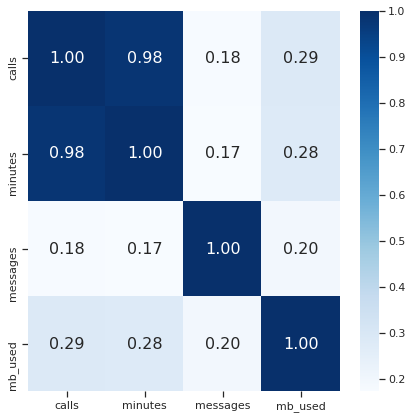

In [10]:
# проверим как скоррелированы переменные друг с другом. 
# если есть сильные корреляции, то исключим из анализа некоторые переменные

plt.figure(figsize=(7,7))
(
    sns.heatmap(data.drop('is_ultra', axis=1)
                .corr(), 
                annot=True, 
                cmap="Blues", 
                fmt='.2f', 
                annot_kws={'size':16})
);


**Краткие выводы**  
1) В датасете представлена информация о поведении пользователей: число совершенных звонков и их суммарная длительность в минутах; число отправленных sms-сообщений; объем израсходованного интернет-трафика (в Mб). В последнем столбце представлена информация о тарифе пользователя: `ultra` (1) или `smart` (0).  
2) Данные полные, без пропусков.  
3) Типы данных соответсвуют значениям в столбцах.  
4) Названия столбцов соответствуют нижнему регистру.  
5) Пользователей тарифа `smart` больше, чем пользователей тарифа `ultra` (69% против 31%). 
6) Переменные `calls` и `minutes` сильно коррелируют друг с другом. Далее при обучении моделей удалим `calls` из анализа. 

## Обучение моделей

Сначала извлечем признаки и целевой признак, затем поделим исходные данные на обучающую и валидационную. 

- *Целевой признак* - какой тариф предложить. Категориальная переменная. Поэтому будем использовать методы классификации.
- *Признаки* - число звонков, длительность звонков, число отправленных сообщений и израсходованный интернет-трафик. 

In [11]:
features = data.drop(['calls', 'is_ultra'], axis=1) # извлекаем признаки 
target = data['is_ultra'] # извлекаем целевой признак

In [12]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size=0.25, random_state=12345) # отделяем 25% данных для валидационной выборки

Выше и ниже далее `random_state` = 12345, добавляем, чтобы результаты не менялись. 

Проверим три модели для классификации: дерево решений; случайный лес; логистическая регрессия.  

Проверим качество каждой из моделей, меняя их гиперпараметры. 

Затем выберем лучшую модель, опираясь на `accuracy`. 

### Дерево решений 

У дерева решений гиперпараметр - это `max_depth`. 

In [13]:
# < сделайте цикл для max_depth от 1 до 5 >

best_model = None
best_result = 0
max_depth = 0

for depth in range(1, 6):
    tree = DecisionTreeClassifier(max_depth = depth, random_state=12345)
    tree.fit(features_train, target_train) # обучим модель
    result = tree.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
    if result > best_result:
        best_model = tree # сохрании наилучшую модель
        best_result = result #  сохраним наилучшее значение метрики accuracy на валидационных данных
        max_depth = depth # сохраним глубину

In [14]:
print("Accuracy наилучшей модели дерева решений на валидационной выборке:", best_result.round(2))
print('Максимальная глубина дерева наилучшей модели на валидационной выборке:', max_depth)

Accuracy наилучшей модели дерева решений на валидационной выборке: 0.8
Максимальная глубина дерева наилучшей модели на валидационной выборке: 4


**Краткий вывод**  
Наилучшая модель дерева решений показала `accuracy` равное 0.80 с гиперпараметром `max_depth = 4`.

## Случайный лес  

Гиперпараметры: 1) `n_estimators` - число деревьев в лесу;  2) `max_depth` - глубина дерева. 

In [15]:
best_model = None
best_result = 0
best_est = 0
best_depth = 0

for est in range(10, 51, 10):
    for depth in range (1, 11):
        forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучим модель с заданным количеством деревьев
        forest.fit(features_train, target_train) # обучим модель на тренировочной выборке
        result = forest.score(features_valid, target_valid) # посчитаем качество модели на валидационной выборке
        if result > best_result:
            best_model = forest # сохраним наилучшую модель
            best_result = result#  сохраним наилучшее значение метрики accuracy на валидационных данных
            best_est = est # сохраним число деревьев
            best_depth = depth # сохраним глубину

In [16]:
print("Accuracy наилучшей модели случайного леса на валидационной выборке:", best_result.round(2))
print('Число деревьев наилучшей модели случайного леса на валидационной выборке:', est)
print('Глубина деревьев наилучшей модели случайного леса на валидационной выборке:', max_depth)

Accuracy наилучшей модели случайного леса на валидационной выборке: 0.81
Число деревьев наилучшей модели случайного леса на валидационной выборке: 50
Глубина деревьев наилучшей модели случайного леса на валидационной выборке: 4


**Краткий вывод**  
Наилучшая модель случайного леса с гиперпараметрами `n_estimators` = 50 и `max_depth` = 4 показала `accuracy` равное 0.81, что выше, чем у предыдущей модели. 

Проверим качество логистической модели. 

## Логистическая регрессия 

Для постоянства результата зададим `random_state=12345`.  
Добавим дополнительные гиперпараметры: `solver='lbfgs'` (выбираем алготритм) и `max_iter=1000` (число итераций обучения). 

Алгоритм `'lbfgs'` — один из самых распространённых. Он подходит для большинства задач и поэтому выбираем его. 

In [17]:
logistic = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) # зададим модель
logistic.fit(features_train, target_train) # обучим модель
print(logistic.score(features_valid, target_valid).round(2)) # проверим качество модели

0.7


**Краткий вывод**  
Логистическая регрессия показала самое маленькое `accuracy` = 0.70 по сравнению с остальными моделями. 

**Вывод** 

Самое высокое качество показала модель случайного леса. Проверим далее её качество на тестовой выборке. 

## Проверка качества модели на тестовой выборке

In [18]:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345) # отделяем 25% данных для тестовой выборки

In [19]:
#  инициализируем модель с наилучшим значением метрики accuracy
forest = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=3) 

# обучите модель на тестовой выборке
forest.fit(features_train, target_train) # обучим модель

print("Accuracy наилучшей модели на тестовой выборке:", forest.score(features_test, target_test).round(2)) # оценим качество

Accuracy наилучшей модели на тестовой выборке: 0.79


In [20]:
accuracy_score(target_test, forest.predict(features_test))

0.7910447761194029

**Краткий вывод** 

Показатель `accuracy` на тестовой выборке равен 0.79. На валидационной выборк была получена точность, равная 0.81. Результаты на тестовой выборке незначительно отличаются от результатов валидационной набора данных. Можно утверждать, что модель вполне рабочая. Она не переобучена и не недобучена. 

Проверим еще важность полученных весов.  Потом приму решение может быть стоит поменять модель. А поскольку дерево решений склонно к переобучению, то лучше использовать для предсказания логистическую регрессию.

In [21]:
tree.feature_importances_

array([0.3321078 , 0.18104671, 0.48684549])

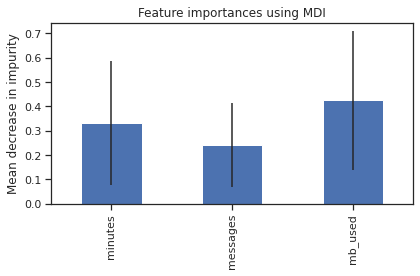

In [22]:
feature_names = features_test.columns
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

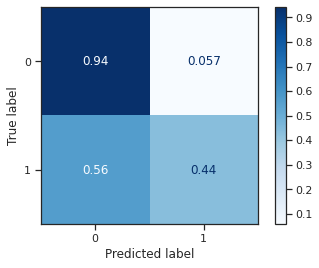

In [23]:
# построим матрицу ошибок
target_pred = forest.predict(features_test)
plot_confusion_matrix(estimator=forest, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues');

**Краткий вывод**  
Веса коэффициентов в сумме дают 1, что верно. Среди коэффициентов наибольший вес имеет израсходованный интернет-трафик (`mb_used`), наименьший - число отправленных сообщений (`messages`).  

Наша модель хорошо предсказывает отрицательные (нулевые) значения, но не очень хорошо положительные значения. Это вероятнее всего связано с дисбалансом классов. 

## Проверка модели на вменяемость

Для проверки модели на вменяемость создадим последовательность заполненную 1 или 0 в качестве целевого признака. Затем можно попробовать сгенерировать случайную последовательность из 0 и 1**, используя DummyClassifier()**. 

И проверим как работает модель на этих данных.

In [24]:
# проверим как распределены 0 и 1 в тестовой выборке и тренировочной
print('Тренировочная выборка: \n', target_train.value_counts() / len(target_train) *100, '\n')
print('Тестовая выборка: \n', target_test.value_counts() / len(target_test) *100)

Тренировочная выборка: 
 0   69.13
1   30.87
Name: is_ultra, dtype: float64 

Тестовая выборка: 
 0   70.02
1   29.98
Name: is_ultra, dtype: float64


Приблизительно одинакое распределение. Можно сказать, что данные одной природы. 

In [25]:
# проверим на случайном векторе из 1 
random_series = pd.Series(1, index=range(0,len(target_test)))
print("Accuracy на cлучайной выборке:", forest.score(features_test, random_series).round(2)) # оценим качество

Accuracy на cлучайной выборке: 0.17


In [26]:
# оценим долю правильных ответов алгоритма
accuracy_score(target_test, random_series).round(4)

0.2998

In [27]:
# проверим на случайном векторе из 1 
random_series = pd.Series(0, index =range(0,len(target_test)))
print("Accuracy на cлучайной выборке:", accuracy_score(target_test, random_series).round(4)) # оценим качество

Accuracy на cлучайной выборке: 0.7002


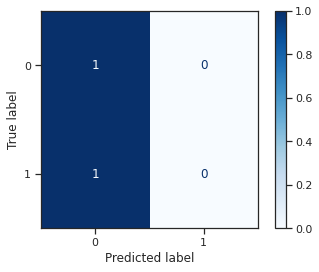

In [28]:
# Построим DummyClassifier и проверим как эта модель предсказывает целевую переменную

clf_dummy = DummyClassifier(strategy='most_frequent', random_state=12345) 

# обучение модели
clf_dummy.fit(features_train, target_train)

target_dummy_pred = clf_dummy.predict(features_test) # предскажем

plot_confusion_matrix(estimator=clf_dummy, X=features_test, y_true=target_test,
                      normalize='true', cmap='Blues');

In [29]:
print("Accuracy DummyClassifier:", clf_dummy.score(features_test, target_test))

Accuracy DummyClassifier: 0.7002487562189055


Итак, `accuracy` модели Random Forest Classifier выше, чем у константных моделей. Dummy Classifier отлично угадывает отрицательные значения (нулевые значения: является клиентов тарифа `smart`), но абсолютно не угадывает положительные значения. 


## Общий вывод

В рамках этого проекта были протестированы три модели классификации. По метрике `accuracy` лучший результат показала модель случайного леса (`0.81` на валидационной выборке и `0.79` на тестовой выборке). Модель успешно прошла проверку на вменяемость, хотя наша модель предсказывает лишь 44% истинно положительных значений. Это может быть связано с дисбалансом классов. В дальнейшем для улучшения модели нужно провести балансировку классов и заново проверить качество модели. 